# Import & Read

In [2]:
# import package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')
plt.style.use('seaborn')

In [3]:
# load data set
data = pd.read_csv('Train.csv')

In [4]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


1 = late; 0 = on time

## Exploratory Data Analysis (EDA)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB


In [6]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


In [14]:
data.shape

(10999, 12)

In [20]:
data['Reached.on.Time_Y.N'].value_counts()

1    6563
0    4436
Name: Reached.on.Time_Y.N, dtype: int64

In [13]:
for column in data.columns:
    print('Count unique data of {} : {}'.format(column,data[column].nunique()))

Count unique data of ID : 10999
Count unique data of Warehouse_block : 5
Count unique data of Mode_of_Shipment : 3
Count unique data of Customer_care_calls : 6
Count unique data of Customer_rating : 5
Count unique data of Cost_of_the_Product : 215
Count unique data of Prior_purchases : 8
Count unique data of Product_importance : 3
Count unique data of Gender : 2
Count unique data of Discount_offered : 65
Count unique data of Weight_in_gms : 4034
Count unique data of Reached.on.Time_Y.N : 2


In [19]:
numerical = []
categorical = []

for column in data.columns:
    if data[column].nunique() > 10:
        numerical.append(column)
    else:
        categorical.append(column)

print('numerical : ', numerical)
print()
print('categorical: ', categorical)


numerical :  ['ID', 'Cost_of_the_Product', 'Discount_offered', 'Weight_in_gms']

categorical:  ['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls', 'Customer_rating', 'Prior_purchases', 'Product_importance', 'Gender', 'Reached.on.Time_Y.N']


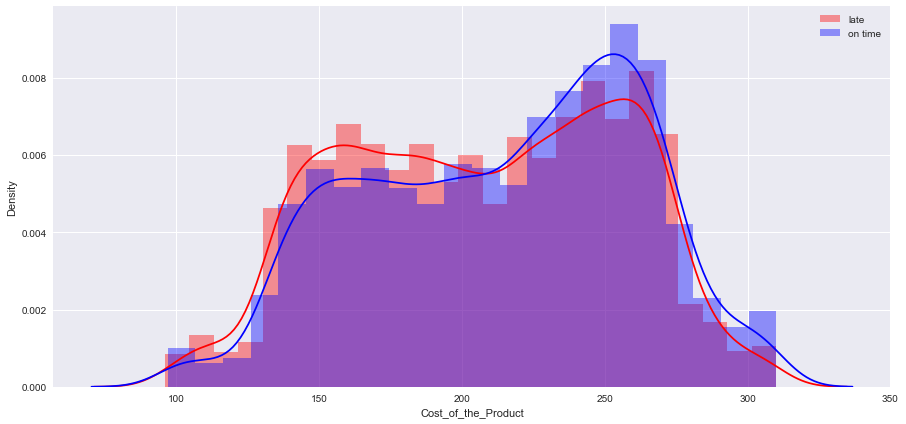

In [42]:
plt.figure(figsize=(15,7))
sns.distplot(data.Cost_of_the_Product[data['Reached.on.Time_Y.N'] == 1],color='r',label='late')
sns.distplot(data.Cost_of_the_Product[data['Reached.on.Time_Y.N'] == 0],color='b', label='on time')
plt.legend()

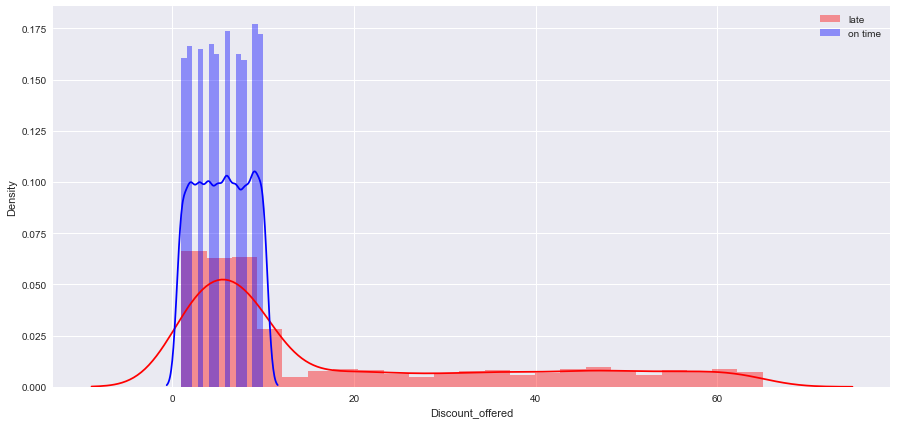

In [65]:
plt.figure(figsize=(15,7))
sns.distplot(data.Discount_offered[data['Reached.on.Time_Y.N'] == 1],color='r',label='late')
sns.distplot(data.Discount_offered[data['Reached.on.Time_Y.N'] == 0],color='b', label='on time')
plt.legend()

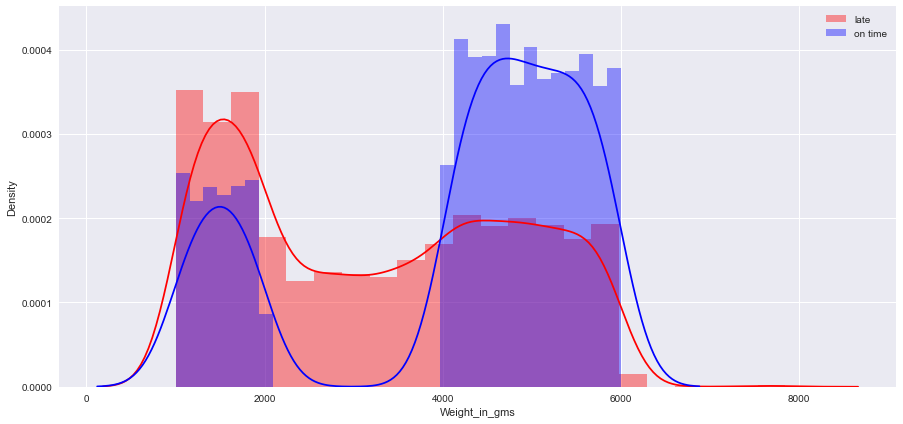

In [66]:
plt.figure(figsize=(15,7))
sns.distplot(data.Weight_in_gms[data['Reached.on.Time_Y.N'] == 1],color='r',label='late')
sns.distplot(data.Weight_in_gms[data['Reached.on.Time_Y.N'] == 0],color='b', label='on time')
plt.legend()

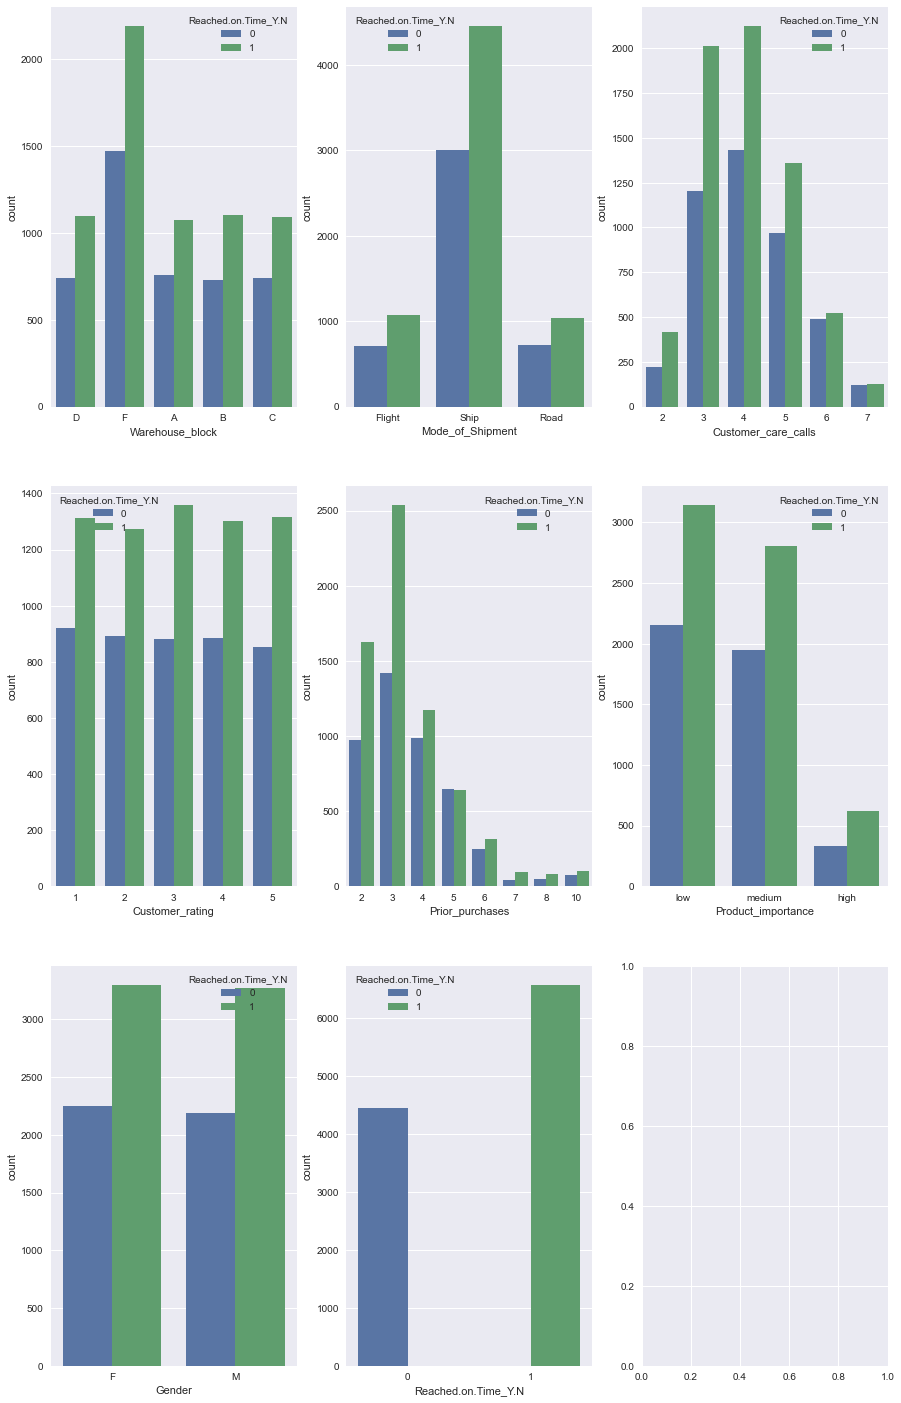

In [72]:
fig, ax = plt.subplots(3,3,figsize=(15,25))

for var, ax in zip(categorical,ax.flatten()):
    sns.countplot(var, data=data, hue='Reached.on.Time_Y.N', ax=ax)

# Data Cleaning & Preprocessing

In [6]:
data.rename(columns={'Reached.on.Time_Y.N':'Reached_on_time'}, inplace=True)

### Detecting & Handling Missing Values

In [7]:
data.isnull().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

In [8]:
data.isna().sum()

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached_on_time        0
dtype: int64

### Detecting & Handling Outliers

In [9]:
check_outlier = data.select_dtypes('int64')
check_outlier.columns

Index(['ID', 'Customer_care_calls', 'Customer_rating', 'Cost_of_the_Product',
       'Prior_purchases', 'Discount_offered', 'Weight_in_gms',
       'Reached_on_time'],
      dtype='object')

In [10]:
# Make function to detect outlier using upper bound and lower bound
def outlier(sample):
    Q1=sample.quantile(0.25)
    Q3=sample.quantile(0.75)
    IQR=Q3-Q1
    lower_range = Q1 -(1.5 * IQR)
    upper_range = Q3 +(1.5 * IQR)
    
    number_outlier=len(sample[sample>upper_range])+len(sample[sample<lower_range])
    print("- Number of Outlier From Variable {} : {}".format(sample.name, number_outlier))
    
#     if number_outlier>0:
#         print("  Outlier observation row:")
#     else:
#         pass
#     out_list = []
    
#     for i in range(len(sample)):
#         if sample[i]<lower_range: 
#             out_list.append(i)
#         elif sample[i]>upper_range:
#             out_list.append(i) 
#         else:
#             pass
#     if out_list != []:
#         print(' ', out_list)

In [11]:
for column in check_outlier.columns:
    outlier(data[column])

- Number of Outlier From Variable ID : 0
- Number of Outlier From Variable Customer_care_calls : 0
- Number of Outlier From Variable Customer_rating : 0
- Number of Outlier From Variable Cost_of_the_Product : 0
- Number of Outlier From Variable Prior_purchases : 1003
- Number of Outlier From Variable Discount_offered : 2209
- Number of Outlier From Variable Weight_in_gms : 0
- Number of Outlier From Variable Reached_on_time : 0


### Detecting & Handling Duplicates Values

In [12]:
data.duplicated().any()

False

### Detecting & Handling Imbalance Data

<AxesSubplot:>

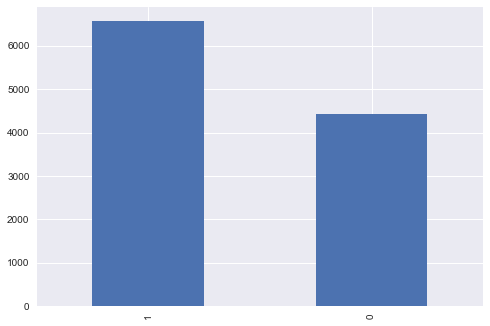

In [13]:
data['Reached_on_time'].value_counts().plot(kind='bar')

### Data Scaling

In [14]:
data.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached_on_time
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1


### Encoding

In [15]:
encode_columns = list(data.select_dtypes('object').columns)
encode_le = []
encode_ohe = []

In [16]:
for column in encode_columns:
    if data[column].nunique() > 2:
        encode_ohe.append(column)
    else:
        encode_le.append(column)

In [17]:
print(encode_le)
print(encode_ohe)

['Gender']
['Warehouse_block', 'Mode_of_Shipment', 'Product_importance']


In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in encode_le:
    data[column] = le.fit_transform(data[column])

In [19]:
data = pd.get_dummies(data, columns=encode_ohe)

In [20]:
data.head()

,ID,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Gender,Discount_offered,Weight_in_gms,Reached_on_time,Warehouse_block_A,Warehouse_block_B,Warehouse_block_C,Warehouse_block_D,Warehouse_block_F,Mode_of_Shipment_Flight,Mode_of_Shipment_Road,Mode_of_Shipment_Ship,Product_importance_high,Product_importance_low,Product_importance_medium
0,1,4,2,177,3,0,44,1233,1,0,0,0,1,0,1,0,0,0,1,0
1,2,4,5,216,2,1,59,3088,1,0,0,0,0,1,1,0,0,0,1,0
2,3,2,2,183,4,1,48,3374,1,1,0,0,0,0,1,0,0,0,1,0
3,4,3,3,176,4,1,10,1177,1,0,1,0,0,0,1,0,0,0,0,1
4,5,2,2,184,3,0,46,2484,1,0,0,1,0,0,1,0,0,0,0,1
